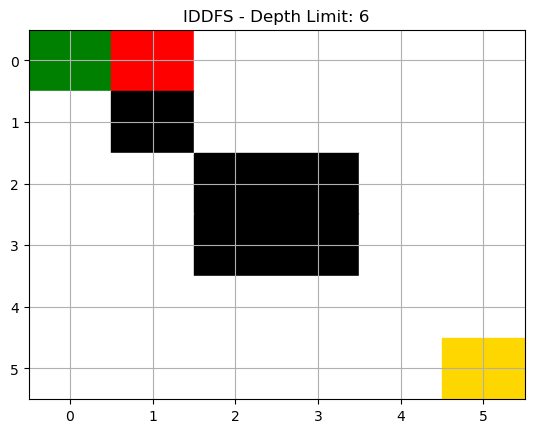

In [ ]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

ROWS, COLS = 6, 6
start = (0, 0)
goal = (5, 5)
obstacles = {(1, 1), (2, 2), (3, 3), (3, 2), (2, 3)}

def draw_grid(path=set(), frontier=set(), visited=set(), current=None, depth=None):
    fig, ax = plt.subplots()
    ax.set_xticks(range(COLS+1))
    ax.set_yticks(range(ROWS+1))
    ax.grid(True)
    ax.set_xlim(-0.5, COLS - 0.5)
    ax.set_ylim(-0.5, ROWS - 0.5)
    ax.invert_yaxis()

    for r in range(ROWS):
        for c in range(COLS):
            color = 'white'
            if (r, c) in obstacles:
                color = 'black'
            elif (r, c) == start:
                color = 'green'
            elif (r, c) == goal:
                color = 'gold'
            elif (r, c) == current:
                color = 'red'
            elif (r, c) in path:
                color = 'blue'
            elif (r, c) in frontier:
                color = 'orange'
            elif (r, c) in visited:
                color = 'lightgray'
            ax.add_patch(plt.Rectangle((c-0.5, r-0.5), 1, 1, color=color))

    if depth is not None:
        ax.set_title(f"IDDFS - Depth Limit: {depth}")
    else:
        ax.set_title("Iterative Deepening DFS")
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

def dfs_limited(node, goal, depth, visited, path):
    draw_grid(path=set(path), visited=visited, current=node, depth=depth)
    if node == goal:
        return path
    if depth == 0:
        return None
    visited.add(node)
    r, c = node
    for dr, dc in [(0,1),(1,0),(-1,0),(0,-1)]:
        nr, nc = r+dr, c+dc
        next_node = (nr, nc)
        if (0 <= nr < ROWS and 0 <= nc < COLS 
            and next_node not in visited 
            and next_node not in obstacles):
            result = dfs_limited(next_node, goal, depth-1, visited.copy(), path + [next_node])
            if result:
                return result
    return None

def iddfs(start, goal, max_depth=20):
    for depth in range(max_depth):
        visited = set()
        result = dfs_limited(start, goal, depth, visited, [start])
        if result:
            draw_grid(path=set(result))
            return result
    return None

# Run it
iddfs(start, goal)
